##gesturon v_1.2

 This Python 3 environment comes with many helpful analytics libraries installed
 It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
 For example, here's several helpful packages to load
 Input data files are available in the read-only "../input/" directory
 For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
 You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
!pip install kagglehub
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 30.3 MB/s eta 0:00:00


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("soumicksarker/ipn-hand-dataset")

print("Path to dataset files:", path)

!cp -R /root/.cache/kagglehub/datasets/soumicksarker/ipn-hand-dataset/versions/7 /content

100%|██████████| 4.61G/4.61G [01:01<00:00, 80.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/soumicksarker/ipn-hand-dataset/versions/7


In [5]:
metadata = pd.read_excel('/content/7/annotations/annotations/metadata.xlsx')
metadata.head()

,Video Name,Frames,Sex,Hand,Background,Illumination,People in Scene,Background Motion,Set
0,1CM1_4_R__229,3751,W,Right,Clutter,Stable,Single,Static,train
1,1CM1_4_R__230,3684,W,Right,Clutter,Stable,Single,Static,train
2,1CM1_4_R__231,3747,W,Right,Clutter,Stable,Single,Static,train
3,1CM1_4_R__232,3858,W,Right,Clutter,Stable,Single,Static,train
4,1CM42_11_R__205,3686,M,Right,Plain,Stable,Single,Static,train


In [6]:
file = open('/content/7/annotations/annotations/class_details.txt')
text = file.read().split('\n')
label_id_dict = dict()
for row in text:
    info = row.split('\t')[:3]
    label_id_dict[info[0]] = info[1:]
label_id_dict

{'id': ['Label', 'Gesture'],
 '1': ['D0X', 'Non-gesture'],
 '2': ['B0A', 'Pointing with one finger'],
 '3': ['B0B', 'Pointing with two fingers'],
 '4': ['G01', 'Click with one finger'],
 '5': ['G02', 'Click with two fingers'],
 '6': ['G03', 'Throw up'],
 '7': ['G04', 'Throw down'],
 '8': ['G05', 'Throw left'],
 '9': ['G06', 'Throw right'],
 '10': ['G07', 'Open twice'],
 '11': ['G08', 'Double click with one finger'],
 '12': ['G09', 'Double click with two fingers'],
 '13': ['G10', 'Zoom in'],
 '14': ['G11', 'Zoom out'],
 '': []}

In [ ]:
train_annotations =  pd.read_csv("/content/7/annotations/annotations/Annot_TrainList.txt",
                                names=["video","label","id","t_start","t_end","frames"])

train_annotations.head()

,video,label,id,t_start,t_end,frames
0,1CM1_4_R__229,D0X,1,1,17,17
1,1CM1_4_R__229,G11,14,18,55,38
2,1CM1_4_R__229,B0B,3,56,284,229
3,1CM1_4_R__229,G04,7,285,308,24
4,1CM1_4_R__229,B0B,3,309,502,194


In [ ]:
test_annotations =  pd.read_csv("/content/7/annotations/annotations/Annot_TestList.txt",
                                names=["video","label","id","t_start","t_end","frames"])

test_annotations.head()

,video,label,id,t_start,t_end,frames
0,1CM1_1_R__217,D0X,1,1,28,28
1,1CM1_1_R__217,G10,13,29,72,44
2,1CM1_1_R__217,B0A,2,73,235,163
3,1CM1_1_R__217,G07,10,236,260,25
4,1CM1_1_R__217,B0A,2,261,448,188


In [ ]:
annotations = pd.read_csv("/content/7/annotations/annotations/Annot_List.txt")
annotations

,video,label,id,t_start,t_end,frames
0,1CM1_4_R__229,D0X,1,1,17,17
1,1CM1_4_R__229,G11,14,18,55,38
2,1CM1_4_R__229,B0B,3,56,284,229
3,1CM1_4_R__229,G04,7,285,308,24
4,1CM1_4_R__229,B0B,3,309,502,194
...,...,...,...,...,...,...
5644,4CM11_24_L__64,D0X,1,3604,3623,20
5645,4CM11_24_L__64,B0A,2,3624,3818,195
5646,4CM11_24_L__64,D0X,1,3819,3830,12
5647,4CM11_24_L__64,G04,7,3831,3881,51


In [7]:
import os
import json

In [8]:
class_details = {}
with open("/content/7/annotations/annotations/class_details.txt", "r") as f:
  next(f)
  for line in f:
    parts = line.strip().split("\t")
    class_id, label, description = parts[0],parts[1],parts[2]
    class_details[label] = {"id": int(class_id),"description":description}

In [9]:
class_details

{'D0X': {'id': 1, 'description': 'Non-gesture'},
 'B0A': {'id': 2, 'description': 'Pointing with one finger'},
 'B0B': {'id': 3, 'description': 'Pointing with two fingers'},
 'G01': {'id': 4, 'description': 'Click with one finger'},
 'G02': {'id': 5, 'description': 'Click with two fingers'},
 'G03': {'id': 6, 'description': 'Throw up'},
 'G04': {'id': 7, 'description': 'Throw down'},
 'G05': {'id': 8, 'description': 'Throw left'},
 'G06': {'id': 9, 'description': 'Throw right'},
 'G07': {'id': 10, 'description': 'Open twice'},
 'G08': {'id': 11, 'description': 'Double click with one finger'},
 'G09': {'id': 12, 'description': 'Double click with two fingers'},
 'G10': {'id': 13, 'description': 'Zoom in'},
 'G11': {'id': 14, 'description': 'Zoom out'}}

In [10]:
gesture_frames = {details["description"]: [] for details in class_details.values()}

In [11]:
gesture_frames

{'Non-gesture': [],
 'Pointing with one finger': [],
 'Pointing with two fingers': [],
 'Click with one finger': [],
 'Click with two fingers': [],
 'Throw up': [],
 'Throw down': [],
 'Throw left': [],
 'Throw right': [],
 'Open twice': [],
 'Double click with one finger': [],
 'Double click with two fingers': [],
 'Zoom in': [],
 'Zoom out': []}

In [16]:
import pandas as pd

# Load gesture descriptions from class_details.txt
class_details = {}
with open("/content/7/annotations/annotations/class_details.txt", "r") as f:
    next(f)  # Skip the header
    for line in f:
        parts = line.strip().split("\t")
        class_id, label, description = parts[0], parts[1], parts[2]
        class_details[label] = description  # Map label to description

# Initialize a list to store DataFrame rows
data = []

with open("/content/7/annotations/annotations/Annot_TrainList.txt", "r") as annotation_file:
    for line in annotation_file:
        # Parse annotation details
        parts = line.strip().split(",")
        video_name, label, gesture_id, t_start, t_end, frames = parts
        t_start, t_end = int(t_start), int(t_end)

        # Map the label to its description
        description = class_details.get(label, "Unknown Gesture")

        # Generate frame indices
        frame_indices = list(range(t_start, t_end + 1))  # List of frame indices

        # Add a row to the DataFrame
        data.append({
            "Label": description,  # Use the description here
            "Video_ID": video_name,
            "Frames": frame_indices  # Store frame indices or names here
        })

# Create the DataFrame
df = pd.DataFrame(data)

# Save or inspect the DataFrame
df.to_csv("gesture_frames_with_descriptions.csv", index=False)
print(df)


                          Label       Video_ID  \
0                   Non-gesture  1CM1_4_R__229   
1                      Zoom out  1CM1_4_R__229   
2     Pointing with two fingers  1CM1_4_R__229   
3                    Throw down  1CM1_4_R__229   
4     Pointing with two fingers  1CM1_4_R__229   
...                         ...            ...   
4034   Pointing with one finger  4CM11_7_R__36   
4035                 Throw down  4CM11_7_R__36   
4036   Pointing with one finger  4CM11_7_R__36   
4037                 Throw left  4CM11_7_R__36   
4038                Non-gesture  4CM11_7_R__36   

                                                 Frames  
0     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
1     [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...  
2     [56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6...  
3     [285, 286, 287, 288, 289, 290, 291, 292, 293, ...  
4     [309, 310, 311, 312, 313, 314, 315, 316, 317, ...  
...                                                

In [18]:
import pandas as pd

# Load gesture descriptions from class_details.txt
class_details = {}
with open("/content/7/annotations/annotations/class_details.txt", "r") as f:
    next(f)  # Skip the header
    for line in f:
        parts = line.strip().split("\t")
        class_id, label, description = parts[0], parts[1], parts[2]
        class_details[label] = description  # Map label to description

# Initialize a list to store DataFrame rows
data = []

with open("/content/7/annotations/annotations/Annot_TestList.txt", "r") as annotation_file:
    for line in annotation_file:
        # Parse annotation details
        parts = line.strip().split(",")
        video_name, label, gesture_id, t_start, t_end, frames = parts
        t_start, t_end = int(t_start), int(t_end)

        # Map the label to its description
        description = class_details.get(label, "Unknown Gesture")

        # Generate frame indices
        frame_indices = list(range(t_start, t_end + 1))  # List of frame indices

        # Add a row to the DataFrame
        data.append({
            "Label": description,  # Use the description here
            "Video_ID": video_name,
            "Frames": frame_indices  # Store frame indices or names here
        })

# Create the DataFrame
df = pd.DataFrame(data)

# Save or inspect the DataFrame
df.to_csv("gesture_frames_Test.csv", index=False)
print(df)

                         Label        Video_ID  \
0                  Non-gesture   1CM1_1_R__217   
1                      Zoom in   1CM1_1_R__217   
2     Pointing with one finger   1CM1_1_R__217   
3                   Open twice   1CM1_1_R__217   
4     Pointing with one finger   1CM1_1_R__217   
...                        ...             ...   
1605               Non-gesture  4CM11_24_L__64   
1606  Pointing with one finger  4CM11_24_L__64   
1607               Non-gesture  4CM11_24_L__64   
1608                Throw down  4CM11_24_L__64   
1609               Non-gesture  4CM11_24_L__64   

                                                 Frames  
0     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
1     [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4...  
2     [73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 8...  
3     [236, 237, 238, 239, 240, 241, 242, 243, 244, ...  
4     [261, 262, 263, 264, 265, 266, 267, 268, 269, ...  
...                                                

In [55]:
df_train = pd.read_csv('/content/gesture_frames_Train.csv')
df_test = pd.read_csv('/content/gesture_frames_Test.csv')

In [56]:
df_train

,Label,Video_ID,Frames
0,Non-gesture,1CM1_4_R__229,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Zoom out,1CM1_4_R__229,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2..."
2,Pointing with two fingers,1CM1_4_R__229,"[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6..."
3,Throw down,1CM1_4_R__229,"[285, 286, 287, 288, 289, 290, 291, 292, 293, ..."
4,Pointing with two fingers,1CM1_4_R__229,"[309, 310, 311, 312, 313, 314, 315, 316, 317, ..."
...,...,...,...
4034,Pointing with one finger,4CM11_7_R__36,"[3333, 3334, 3335, 3336, 3337, 3338, 3339, 334..."
4035,Throw down,4CM11_7_R__36,"[3574, 3575, 3576, 3577, 3578, 3579, 3580, 358..."
4036,Pointing with one finger,4CM11_7_R__36,"[3689, 3690, 3691, 3692, 3693, 3694, 3695, 369..."
4037,Throw left,4CM11_7_R__36,"[3892, 3893, 3894, 3895, 3896, 3897, 3898, 389..."


In [46]:
df_train_smol = df_train.head()
df_train_smol

,Label,Video_ID,Frames
0,Non-gesture,1CM1_4_R__229,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Zoom out,1CM1_4_R__229,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2..."
2,Pointing with two fingers,1CM1_4_R__229,"[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6..."
3,Throw down,1CM1_4_R__229,"[285, 286, 287, 288, 289, 290, 291, 292, 293, ..."
4,Pointing with two fingers,1CM1_4_R__229,"[309, 310, 311, 312, 313, 314, 315, 316, 317, ..."


In [47]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import mediapipe as mp

video_dir = '/content/7/videos/videos'
output_dir = '/content'
os.makedirs(output_dir, exist_ok=True)

# Assuming df_train_smol is the DataFrame
# Example: df_train_smol = pd.read_csv('gesture_frames_with_descriptions.csv')

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize PCA for dimensionality reduction
pca = PCA(n_components=10)  # Reduce to 10 dimensions

# To store flow vectors
flow_vectors = []
labels = []

for index, row in df_train_smol.iterrows():
    label = row['Label']
    video_id = row['Video_ID']
    frame_indices = eval(row['Frames'])

    video_path = os.path.join(video_dir, f"{video_id}.avi")
    if not os.path.exists(video_path):
        print(f"Video file not found: {video_path}")
        continue

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        continue

    # To store landmarks for the frames in the current gesture
    gesture_landmarks = []

    for frame_idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx - 1)
        ret, frame = cap.read()
        if not ret:
            print(f"Error reading frame {frame_idx} from video {video_id}")
            continue

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(frame_rgb)

        if results.multi_hand_landmarks:
            # Use the first detected hand
            hand_landmarks = results.multi_hand_landmarks[0]
            landmarks = [(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark]
            gesture_landmarks.append(landmarks)

    cap.release()

    # Calculate flow vectors if there are enough landmarks
    if len(gesture_landmarks) > 1:
        # Convert to NumPy array: Shape (T, 21, 3)
        gesture_landmarks = np.array(gesture_landmarks)

        # Compute temporal differences: Shape (T-1, 21, 3)
        temporal_diff = np.diff(gesture_landmarks, axis=0)

        # Flatten each frame's differences into a 1D vector: Shape (T-1, 63)
        flow_vector = temporal_diff.reshape(temporal_diff.shape[0], -1)

        # Apply PCA to reduce dimensions
        flow_vector_reduced = pca.fit_transform(flow_vector)  # Shape: (T-1, 10)

        # Save the reduced flow vector and label
        flow_vectors.append(flow_vector_reduced)
        labels.append(label)

hands.close()

# Save flow vectors to a file
flow_vectors_output = {
    "labels": labels,
    "flow_vectors": flow_vectors
}
np.save(os.path.join(output_dir, "flow_vectors.npy"), flow_vectors_output)
print("Flow vectors have been calculated, reduced, and saved to {output_dir}")


Error reading frame 15 from video 1CM1_4_R__229
Error reading frame 16 from video 1CM1_4_R__229
Error reading frame 17 from video 1CM1_4_R__229
Error reading frame 25 from video 1CM1_4_R__229
Error reading frame 26 from video 1CM1_4_R__229
Flow vectors have been calculated, reduced, and saved to {output_dir}


In [57]:
import numpy as np

# Path to the saved NumPy file
npy_file_path = "/content/flow_vectors.npy"

# Load the file
flow_vectors_data = np.load(npy_file_path, allow_pickle=True).item()

# Extract labels and flow vectors
labels = flow_vectors_data["labels"]
flow_vectors = flow_vectors_data["flow_vectors"]

print("Loaded labels:", labels[:5])  # Print first 5 labels
print("Flow vector shape for first gesture:", flow_vectors[1].shape)  # Shape of first flow vector


Loaded labels: ['Non-gesture', 'Zoom out', 'Pointing with two fingers', 'Throw down', 'Pointing with two fingers']
Flow vector shape for first gesture: (34, 10)


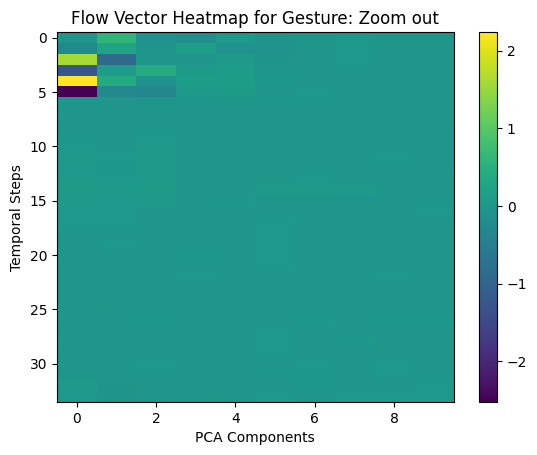

In [58]:
import matplotlib.pyplot as plt

# Visualize the first flow vector as a heatmap
gesture_index = 1
flow_vector = flow_vectors[gesture_index]  # Shape: (T-1, PCA_components)

plt.imshow(flow_vector, cmap="viridis", aspect="auto")
plt.colorbar()
plt.title(f"Flow Vector Heatmap for Gesture: {labels[gesture_index]}")
plt.xlabel("PCA Components")
plt.ylabel("Temporal Steps")
plt.show()


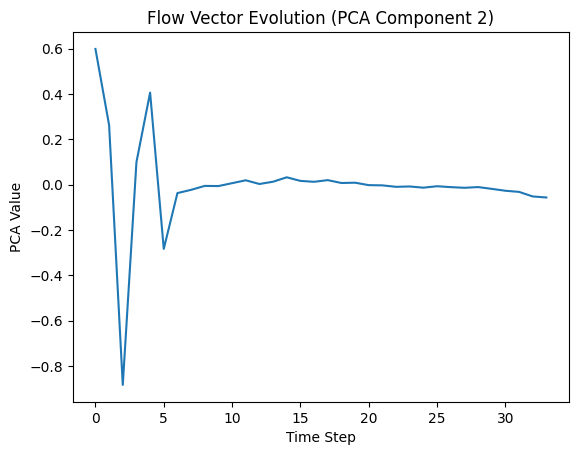

In [59]:
# Plot the first PCA component over time for the first gesture
pca_component_index = 1
plt.plot(flow_vector[:, pca_component_index])
plt.title(f"Flow Vector Evolution (PCA Component {pca_component_index + 1})")
plt.xlabel("Time Step")
plt.ylabel("PCA Value")
plt.show()


In [60]:
import pandas as pd

# Convert the first flow vector to a DataFrame
df = pd.DataFrame(flow_vector, columns=[f"PCA_{i+1}" for i in range(flow_vector.shape[1])])

print(df.head())  # View the first few rows of the flow vector

      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -0.043860  0.598207 -0.119450 -0.187257  0.058923 -0.056308  0.002554   
1 -0.254711  0.261980 -0.063652  0.163108 -0.105892 -0.073159  0.006961   
2  1.599171 -0.882799 -0.005510 -0.023838  0.039448 -0.054891  0.005586   
3 -1.246804  0.098947  0.404786  0.072293  0.095073 -0.025324 -0.002522   
4  2.240548  0.405574 -0.121708  0.139924  0.093397  0.019406  0.006799   

      PCA_8     PCA_9    PCA_10  
0  0.010492 -0.004853  0.005732  
1  0.009018 -0.004914  0.007644  
2  0.010418 -0.006406  0.002230  
3  0.005034 -0.000596  0.000749  
4 -0.000620  0.002688 -0.009412  


In [54]:
unique_labels = set(labels)
print("Unique gesture labels:", unique_labels)

Unique gesture labels: {'Throw down', 'Pointing with two fingers', 'Non-gesture', 'Zoom out'}
